In [1]:
##imporrting the python packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
##importing the dataset
liver_data = pd.read_csv(r"C:\Users\moham\Downloads\indian_liver_patient.csv")


In [7]:
liver_data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [9]:
##checking fro duplicate values
liver_data.duplicated().sum()

13

In [11]:
#dropping the duplicate datas
liver_data.drop_duplicates(inplace=True)

In [13]:
liver_data.duplicated().sum()

0

In [17]:
##dropping the missing/ null values
liver_data.isnull().sum().sum()

4

In [25]:
liver_data.isnull().mean()*100

Age                           0.000000
Gender                        0.000000
Total_Bilirubin               0.000000
Direct_Bilirubin              0.000000
Alkaline_Phosphotase          0.000000
Alamine_Aminotransferase      0.000000
Aspartate_Aminotransferase    0.000000
Total_Protiens                0.000000
Albumin                       0.000000
Albumin_and_Globulin_Ratio    0.701754
Dataset                       0.000000
dtype: float64

In [27]:
liver_data.isnull().sum()/len(liver_data)*100

Age                           0.000000
Gender                        0.000000
Total_Bilirubin               0.000000
Direct_Bilirubin              0.000000
Alkaline_Phosphotase          0.000000
Alamine_Aminotransferase      0.000000
Aspartate_Aminotransferase    0.000000
Total_Protiens                0.000000
Albumin                       0.000000
Albumin_and_Globulin_Ratio    0.701754
Dataset                       0.000000
dtype: float64

In [ ]:
## we are having more than 25% msiising data in Albumin_and_Globulin_Ratio column but we cannot drop it as its a svery important column in this data
#lets fill this 

In [31]:
## lets visualise all the dats present in each column
for i in liver_data.columns:
    print("*************" , i , "*********************")
    print(set(liver_data[i].tolist()))

************* Age *********************
{4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 78, 84, 85, 90}
************* Gender *********************
{'Male', 'Female'}
************* Total_Bilirubin *********************
{0.7, 1.0, 1.8, 3.9, 2.7, 1.1, 1.6, 7.3, 2.2, 6.8, 10.9, 6.2, 8.9, 2.0, 14.2, 8.6, 12.7, 15.9, 18.4, 18.0, 11.3, 4.0, 22.7, 23.0, 4.5, 22.8, 18.5, 27.2, 23.2, 22.6, 30.5, 0.5, 1.5, 5.0, 32.6, 26.3, 7.5, 30.8, 8.0, 42.8, 11.0, 11.5, 2.5, 14.5, 75.0, 15.0, 3.0, 3.5, 16.4, 16.6, 19.6, 20.0, 1.9, 1.4, 2.9, 2.4, 22.5, 3.4, 25.0, 5.5, 4.9, 4.4, 5.9, 7.4, 7.9, 9.4, 2.8, 2.3, 3.8, 0.8, 3.3, 1.3, 5.8, 5.3, 6.3, 0.9, 0.6, 0.4, 8.7, 8.2, 10.2, 1.2, 1.7, 14.8, 15.8, 15.2, 3.2, 3.7, 16.7, 4.7, 4.2, 17.7, 17.3, 5.7, 5.2, 6.7, 19.8, 7.7, 20.2, 23.3, 27.7, 4.1, 6.6, 7.1,

In [33]:
##checking the datatypes of each column
liver_data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [67]:
## encodign the object columns since its the only object i dnt hve to sepereate the object and numeric columns
liver_data1 = pd.get_dummies(liver_data ,columns=["Gender"] ,dtype=int)
liver_data1

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,0,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0,1


In [69]:
##
liver_data1.dtypes

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
Gender_Female                   int32
Gender_Male                     int32
dtype: object

In [71]:
#lets fill the missing values
liver_data1.isnull().sum()/len(liver_data1)*100

Age                           0.000000
Total_Bilirubin               0.000000
Direct_Bilirubin              0.000000
Alkaline_Phosphotase          0.000000
Alamine_Aminotransferase      0.000000
Aspartate_Aminotransferase    0.000000
Total_Protiens                0.000000
Albumin                       0.000000
Albumin_and_Globulin_Ratio    0.701754
Dataset                       0.000000
Gender_Female                 0.000000
Gender_Male                   0.000000
dtype: float64

In [75]:
#using knn imputer to fill the missing values
from sklearn.impute import KNNImputer
liver_data_imputed = KNNImputer(n_neighbors=7).fit_transform(liver_data1)
liver_data_imputed = pd.DataFrame(liver_data_imputed , columns = liver_data1.columns)
liver_data_imputed

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0,1.0,0.0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0,0.0,1.0
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0,0.0,1.0
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0,0.0,1.0
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
565,60.0,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,2.0,0.0,1.0
566,40.0,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1.0,0.0,1.0
567,52.0,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1.0,0.0,1.0
568,31.0,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1.0,0.0,1.0


In [77]:
liver_data_imputed.isnull().sum()
## no more missing values


Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
Gender_Female                 0
Gender_Male                   0
dtype: int64

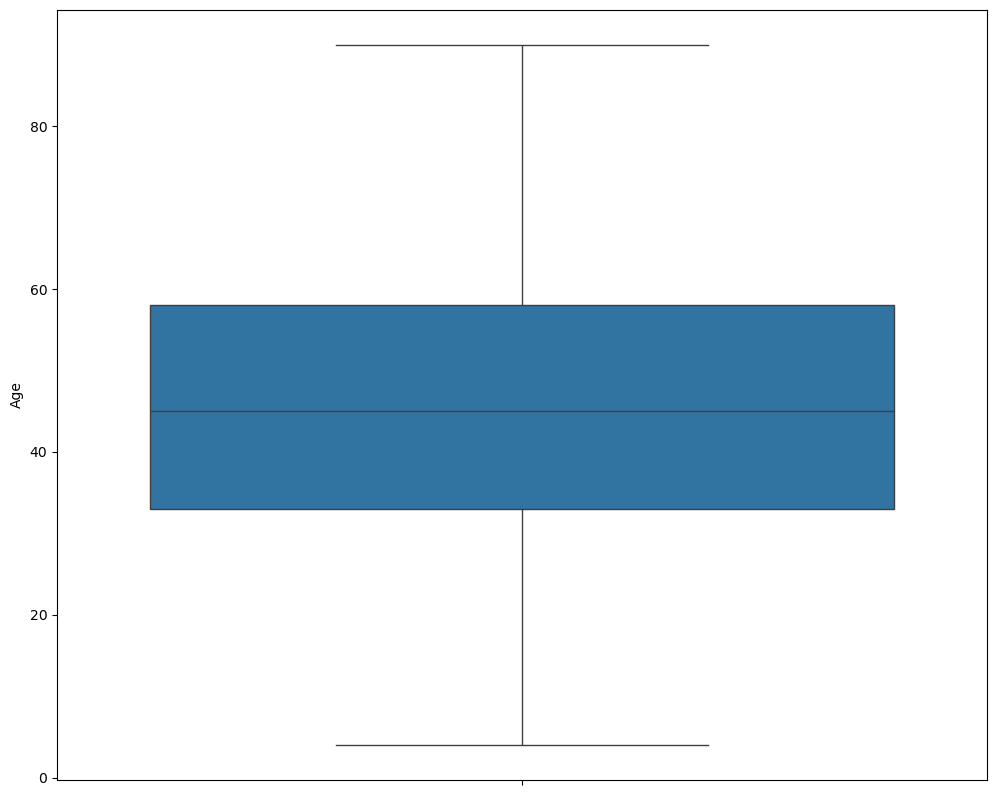

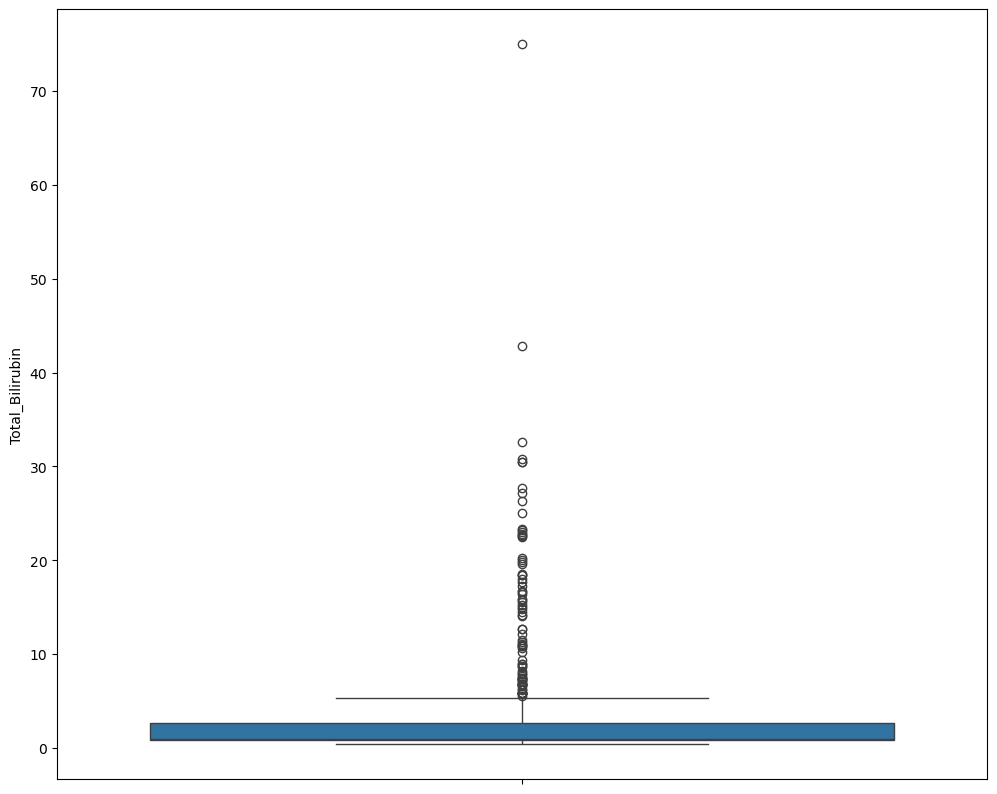

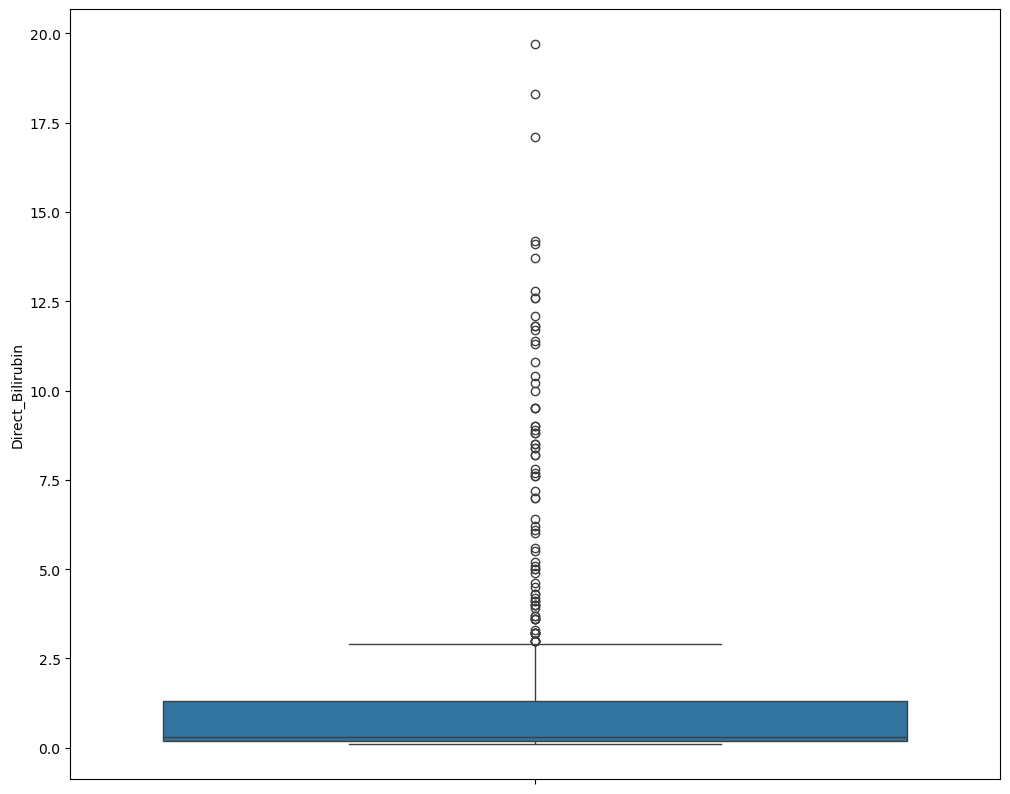

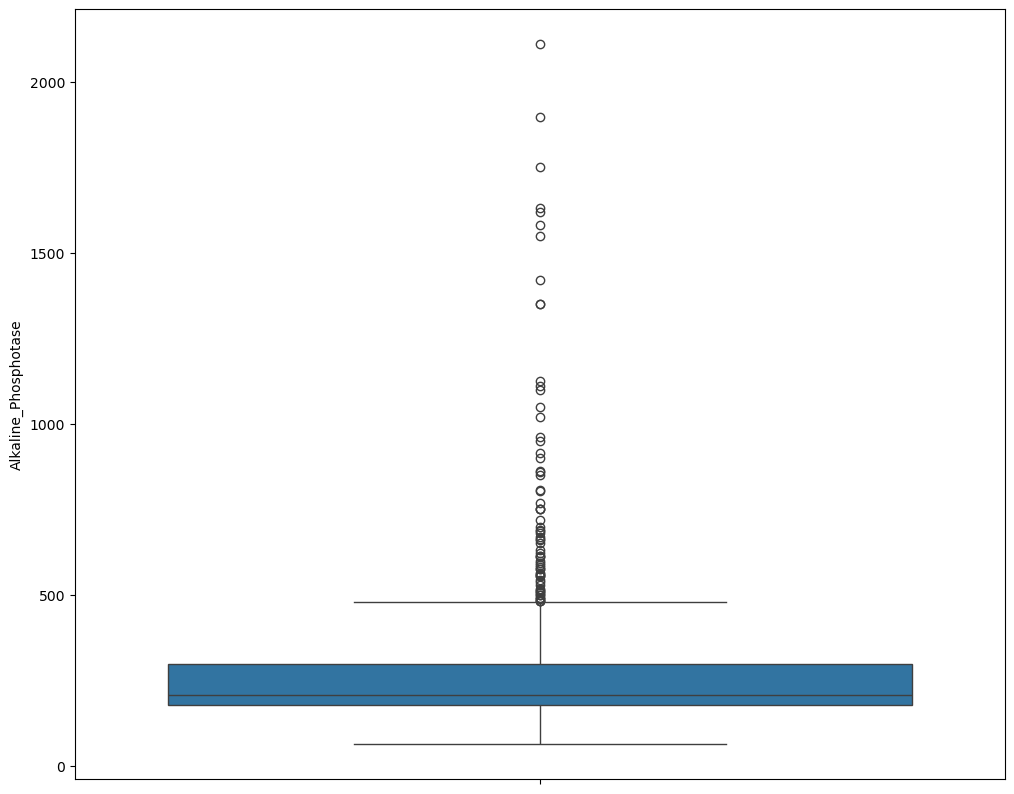

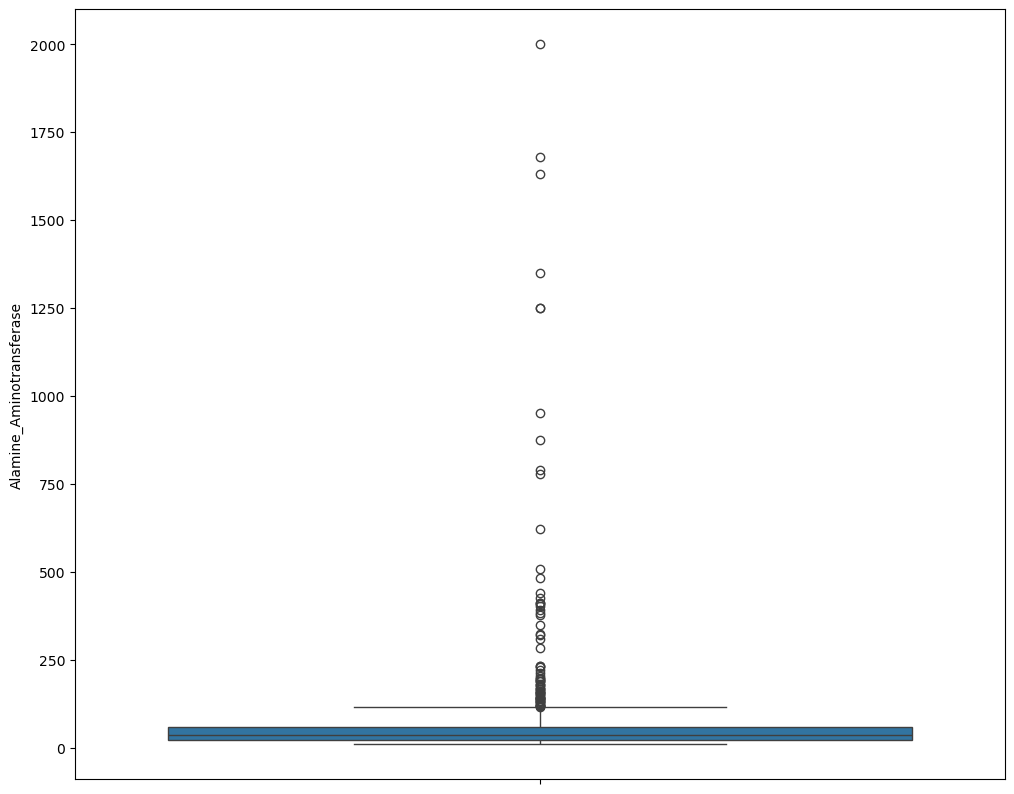

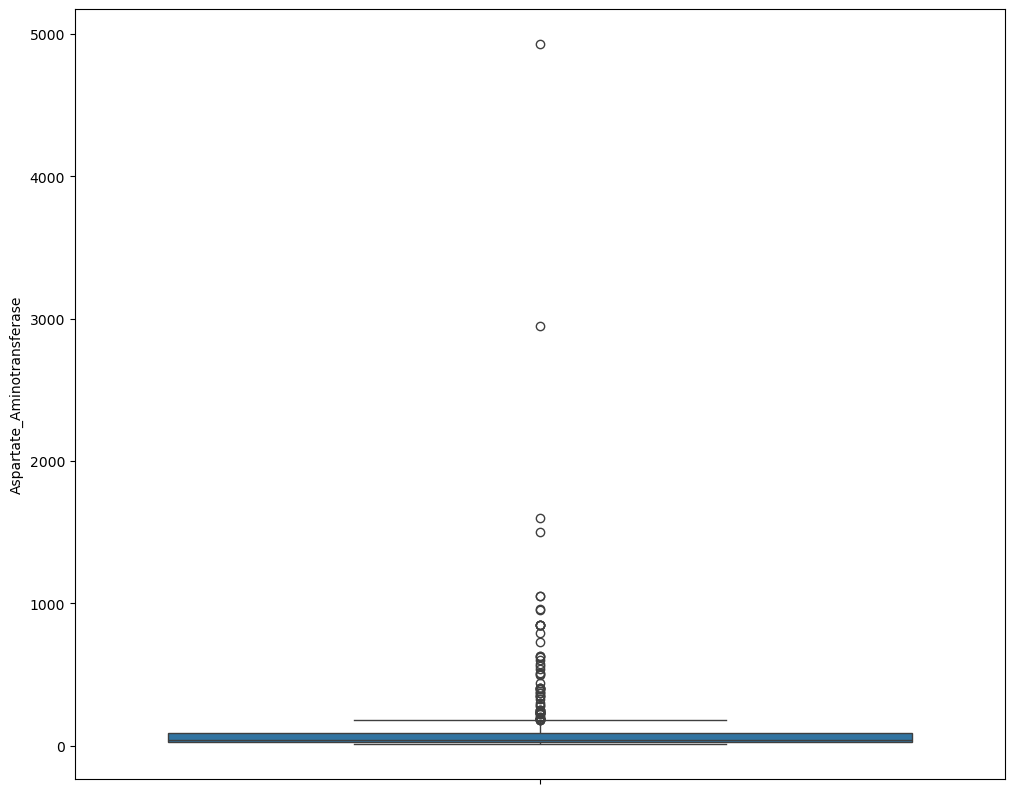

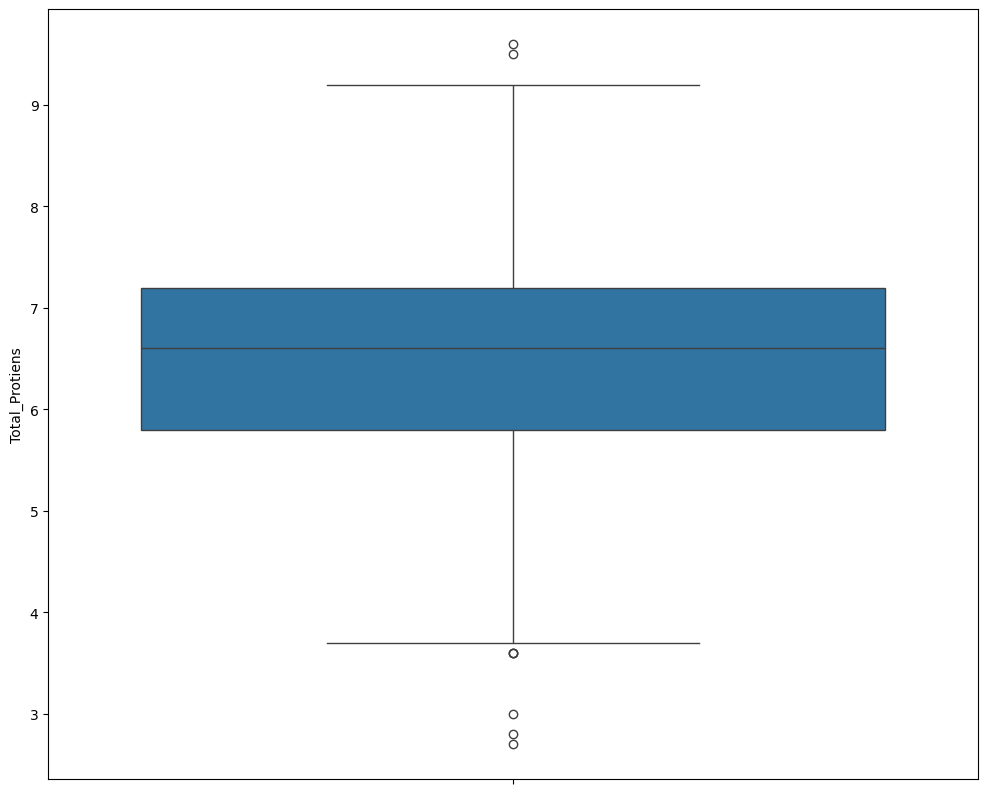

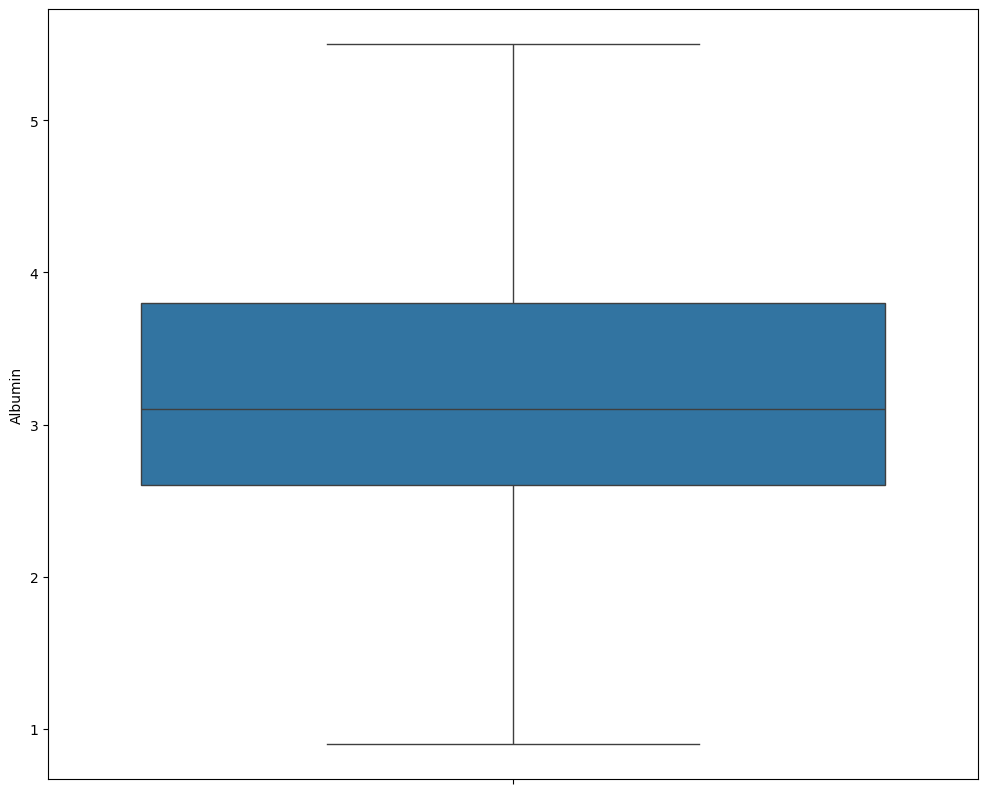

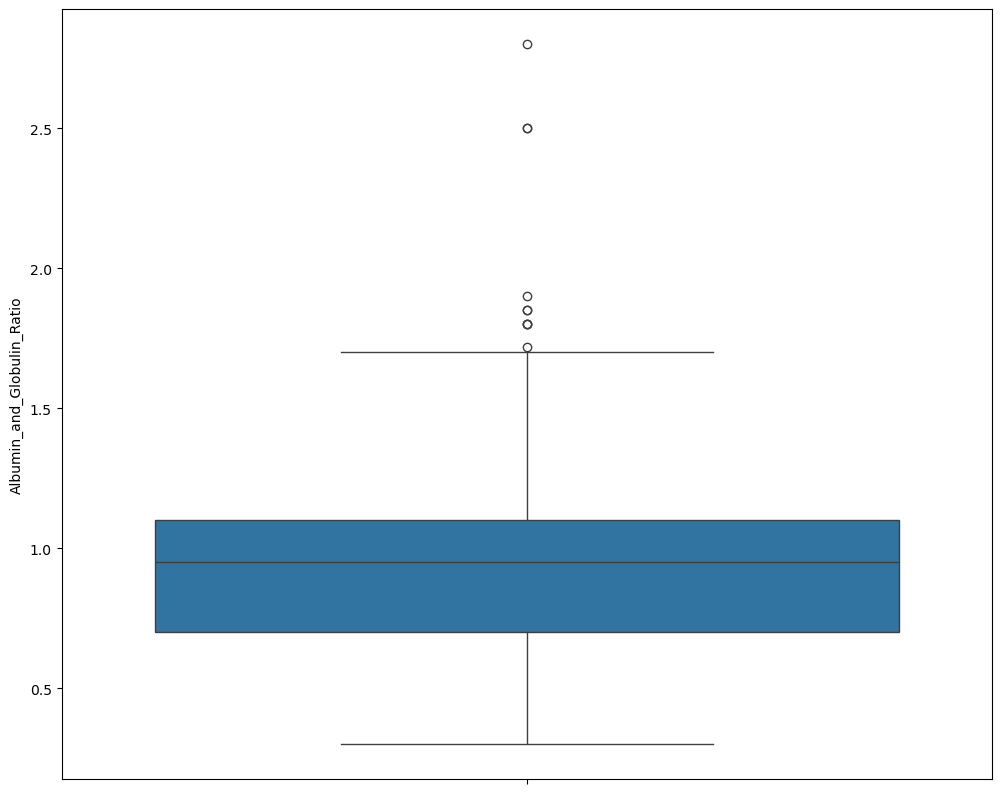

In [85]:
##  checkignt he outliers if any
def boxplt(cols):
    if liver_data_imputed[cols].nunique()>3:
        plt.figure(figsize=(12,10))
        sns.boxplot(liver_data_imputed[cols])
        plt.show()

for cols in liver_data_imputed.columns:
    boxplt(cols)
    

In [87]:
## checking the  5 point statstical summary
liver_data_imputed.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.947591,1.287719,0.245614,0.754386
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.318689,0.453097,0.430829,0.430829
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [91]:
## spltiing the dependent and independent variables
liver_dat_ind = liver_data_imputed.drop("Dataset" ,axis=1)
liver_dat_ind

liver_data_dep = liver_data_imputed["Dataset"]
liver_data_dep

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
565    2.0
566    1.0
567    1.0
568    1.0
569    2.0
Name: Dataset, Length: 570, dtype: float64

In [95]:
## checking the target variable
liver_data_dep.value_counts(normalize=True)
#its an imbalance data set

Dataset
1.0    0.712281
2.0    0.287719
Name: proportion, dtype: float64

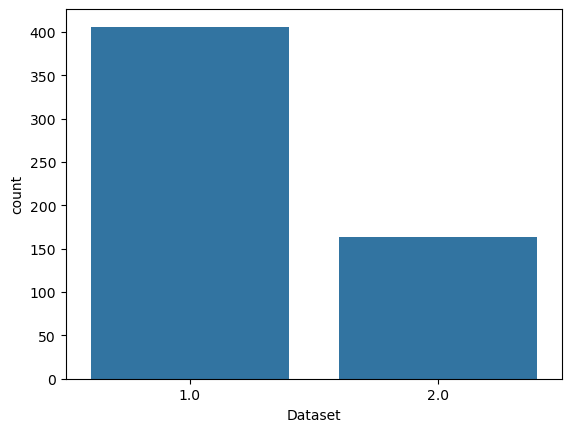

In [101]:
sns.countplot(liver_data_imputed ,x ="Dataset" )
plt.show()

In [105]:
# splitting the data into train test
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test =  train_test_split(liver_dat_ind ,liver_data_dep,test_size = 0.2 , random_state=47,stratify= liver_data_dep)

In [125]:
## model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , VotingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# evalutaion metrics
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [119]:
## 1 LOGISTIC REGRESSION
logit_model = LogisticRegression().fit(x_train , y_train)
logit_model

LogisticRegression()

In [123]:
## PREDICT
logit_model_pred_training = logit_model.predict(x_train)
logit_model_pred_testing = logit_model.predict(x_test)

In [129]:
## EVALUATION
accuracy_score_logit_model_training = accuracy_score(y_train ,logit_model_pred_training )
accuracy_score_logit_model_training

accuracy_score_logit_model_testing = accuracy_score(y_test ,logit_model_pred_testing )
accuracy_score_logit_model_testing

0.7543859649122807

In [209]:
## CLASSIFICATION REPORT
classification_report_logit_model = classification_report(y_test ,logit_model_pred_testing)
print(classification_report_logit_model)

              precision    recall  f1-score   support

         1.0       0.76      0.95      0.85        81
         2.0       0.69      0.27      0.39        33

    accuracy                           0.75       114
   macro avg       0.73      0.61      0.62       114
weighted avg       0.74      0.75      0.71       114



In [131]:
### DECISION TREE MODEL
dtree_model = DecisionTreeClassifier(criterion='entropy').fit(x_train , y_train)
dtree_model

DecisionTreeClassifier(criterion='entropy')

In [137]:
##PREDICT
dtree_model_pred_training = logit_model.predict(x_train)
dtree_model_pred_testing = logit_model.predict(x_test)

In [189]:
##EVALAUTE
accuracy_score_dtree_model_training = accuracy_score(y_train ,dtree_model_pred_training )
accuracy_score_dtree_model_training

accuracy_score_dtree_model_testing = accuracy_score(y_test ,dtree_model_pred_testing )
accuracy_score_dtree_model_testing

0.7543859649122807

In [211]:
## CLASSIFICATION REPORT
classification_report_decision_tree_model = classification_report(y_test ,dtree_model_pred_testing)
print(classification_report_decision_tree_model)

              precision    recall  f1-score   support

         1.0       0.76      0.95      0.85        81
         2.0       0.69      0.27      0.39        33

    accuracy                           0.75       114
   macro avg       0.73      0.61      0.62       114
weighted avg       0.74      0.75      0.71       114



In [143]:
### RANDOM FOREST
random_forest_model = RandomForestClassifier(oob_score=True).fit(x_train , y_train)
random_forest_model

RandomForestClassifier(oob_score=True)

In [145]:
## PREDICT
random_forest_model_pred_training = logit_model.predict(x_train)
random_forest_model_pred_testing = logit_model.predict(x_test)

In [191]:
#EVALUATION
accuracy_score_random_forest_model_training = accuracy_score(y_train ,random_forest_model_pred_training )
accuracy_score_random_forest_model_training

accuracy_score_random_forest_model_testing = accuracy_score(y_test ,random_forest_model_pred_testing )
accuracy_score_random_forest_model_testing

0.7543859649122807

In [213]:
## CLASSIFICATION REPORT
classification_report_random_forest_model = classification_report(y_test ,random_forest_model_pred_testing)
print(classification_report_random_forest_model)

              precision    recall  f1-score   support

         1.0       0.76      0.95      0.85        81
         2.0       0.69      0.27      0.39        33

    accuracy                           0.75       114
   macro avg       0.73      0.61      0.62       114
weighted avg       0.74      0.75      0.71       114



In [151]:
### GRADIENT BOOSTING
gradient_model = GradientBoostingClassifier(random_state=46).fit(x_train , y_train)
gradient_model

GradientBoostingClassifier(random_state=46)

In [155]:
##PREDICT
gradient_model_pred_training = logit_model.predict(x_train)
gradient_model_pred_testing = logit_model.predict(x_test)

In [157]:
### EVALUATION
accuracy_score_gradient_model_training = accuracy_score(y_train ,gradient_model_pred_training )
accuracy_score_gradient_model_training

accuracy_score_graditn_model_testing = accuracy_score(y_test ,gradient_model_pred_testing )
accuracy_score_graditn_model_testing

0.7543859649122807

In [159]:
####  K NEAREST NEIGHBORS
knn_model = KNeighborsClassifier(n_neighbors=9).fit(x_train , y_train)
knn_model

KNeighborsClassifier(n_neighbors=9)

In [161]:
### PREDICT
KNN_model_pred_training = logit_model.predict(x_train)
KNN_model_pred_testing = logit_model.predict(x_test)

In [163]:
##EVALAUTAION
accuracy_score_KNN_model_training = accuracy_score(y_train ,KNN_model_pred_training )
accuracy_score_KNN_model_training

accuracy_score_KNN_model_testing = accuracy_score(y_test ,KNN_model_pred_testing )
accuracy_score_KNN_model_testing

0.7543859649122807

In [215]:
## CLASSIFICATION REPORT
classification_report_KNN_model = classification_report(y_test ,KNN_model_pred_testing)
print(classification_report_KNN_model)

              precision    recall  f1-score   support

         1.0       0.76      0.95      0.85        81
         2.0       0.69      0.27      0.39        33

    accuracy                           0.75       114
   macro avg       0.73      0.61      0.62       114
weighted avg       0.74      0.75      0.71       114



In [165]:
## SUPPORT VECTOR CLASSIFIER
svc_model =  SVC().fit(x_train , y_train)
svc_model

SVC()

In [167]:
##PREDICT
SVC_model_pred_training = logit_model.predict(x_train)
SVC_model_pred_testing = logit_model.predict(x_test)

In [169]:
#EVALUATION
accuracy_score_SVC_model_training = accuracy_score(y_train ,SVC_model_pred_training )
accuracy_score_SVC_model_training

accuracy_score_SVC_model_testing = accuracy_score(y_test ,SVC_model_pred_testing )
accuracy_score_SVC_model_testing

0.7543859649122807

In [217]:
## CLASSIFICATION REPORT
classification_report_SVC_model = classification_report(y_test ,SVC_model_pred_testing)
print(classification_report_SVC_model)

              precision    recall  f1-score   support

         1.0       0.76      0.95      0.85        81
         2.0       0.69      0.27      0.39        33

    accuracy                           0.75       114
   macro avg       0.73      0.61      0.62       114
weighted avg       0.74      0.75      0.71       114



In [219]:
## NAIVE BAYES 
naive_bayes_model = GaussianNB().fit(x_train , y_train)
naive_bayes_model

GaussianNB()

In [173]:
## PREDICT
GNB_model_pred_training = logit_model.predict(x_train)
GNB_model_pred_testing = logit_model.predict(x_test)

In [175]:
#EVALUATION
accuracy_score_GNB_model_training = accuracy_score(y_train ,GNB_model_pred_training )
accuracy_score_GNB_model_training

accuracy_score_GNB_model_testing = accuracy_score(y_test ,GNB_model_pred_testing )
accuracy_score_GNB_model_testing


0.7543859649122807

In [221]:
## CLASSIFICATION REPORT
classification_report_GNB_model = classification_report(y_test ,GNB_model_pred_testing)
print(classification_report_GNB_model)

              precision    recall  f1-score   support

         1.0       0.76      0.95      0.85        81
         2.0       0.69      0.27      0.39        33

    accuracy                           0.75       114
   macro avg       0.73      0.61      0.62       114
weighted avg       0.74      0.75      0.71       114



In [181]:
## VOTING 
voting_model = VotingClassifier(estimators=[('logit_model' , logit_model),('decision tree' ,dtree_model),('random forest' ,random_forest_model),('gradientmodel',gradient_model),('KNN',knn_model),('SVM',svc_model),('GNB',naive_bayes_model)]).fit(x_train,y_train)

In [183]:
voting_model


VotingClassifier(estimators=[('logit_model', LogisticRegression()),
                             ('decision tree',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('random forest',
                              RandomForestClassifier(oob_score=True)),
                             ('gradientmodel',
                              GradientBoostingClassifier(random_state=46)),
                             ('KNN', KNeighborsClassifier(n_neighbors=9)),
                             ('SVM', SVC()), ('GNB', GaussianNB())])

In [185]:
##PREDICT
voting_model_test = voting_model.predict(x_test)

In [187]:
#EVALUATION
accuracy_score_Voting_model_testing = accuracy_score(y_test ,voting_model_test )
accuracy_score_Voting_model_testing


0.7456140350877193

In [223]:
## CLASSIFICATION REPORT
classification_report_voting_class_model = classification_report(y_test ,voting_model_test)
print(classification_report_voting_class_model)

              precision    recall  f1-score   support

         1.0       0.77      0.93      0.84        81
         2.0       0.62      0.30      0.41        33

    accuracy                           0.75       114
   macro avg       0.70      0.61      0.62       114
weighted avg       0.72      0.75      0.71       114



In [197]:
list1 = ['logit_model','decision tree','random forest','gradientmodel','KNN','SVM','GNB','voting']
list2 = [accuracy_score_logit_model_testing,accuracy_score_dtree_model_testing,accuracy_score_random_forest_model_testing,accuracy_score_graditn_model_testing,
         accuracy_score_KNN_model_testing,accuracy_score_SVC_model_testing,accuracy_score_GNB_model_testing,accuracy_score_Voting_model_testing]


In [199]:
df_models_predictions = pd.DataFrame({'Models_used':list1 , "Accuracy" : list2})
df_models_predictions

,Models_used,Accuracy
0,logit_model,0.754386
1,decision tree,0.754386
2,random forest,0.754386
3,gradientmodel,0.754386
4,KNN,0.754386
5,SVM,0.754386
6,GNB,0.754386
7,voting,0.745614


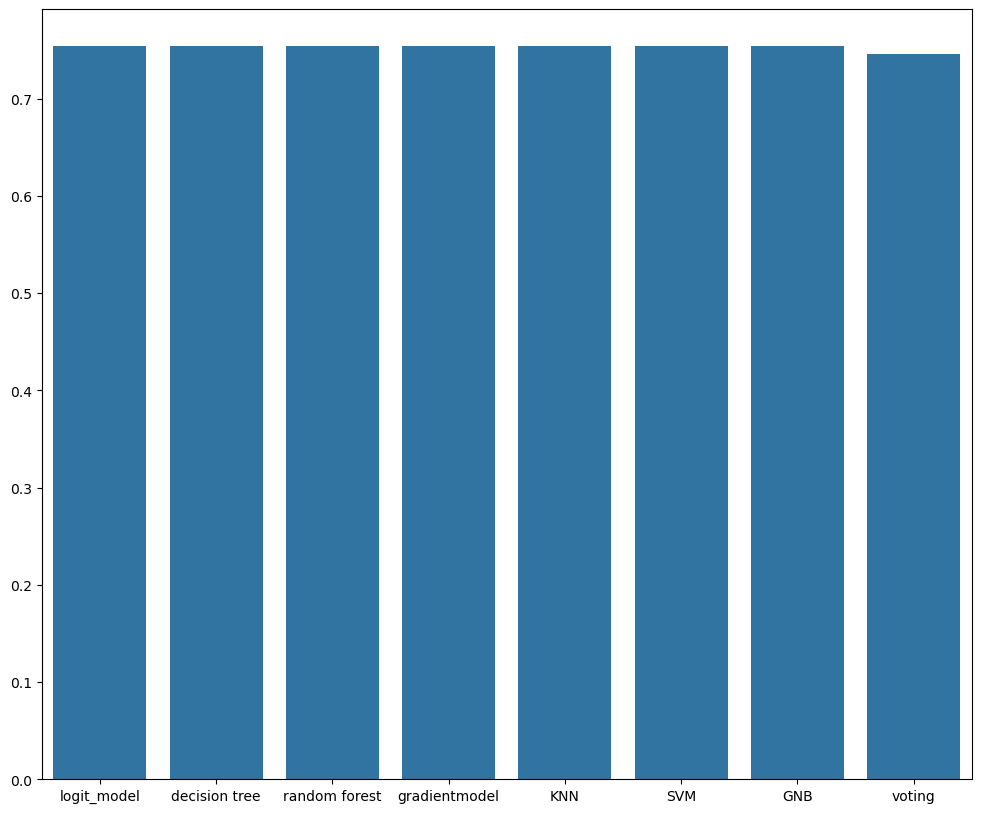

In [201]:
##  checking using barplot
plt.figure(figsize=(12,10))
sns.barplot(data = df_models_predictions , x = list1, y = list2 )
plt.show()

In [205]:
## DOING CROSS VALIDATION FOR THE TRAINING
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(voting_model ,x_train ,y_train ,cv=12)
training_accuracy.mean()

0.6995614035087718